# エンティティ・プロパティのデータについて統計量・内容を見る

In [2]:
import jsonlines
import json

In [3]:
from pprint import PrettyPrinter

pp = PrettyPrinter()

In [ ]:
from pathlib import Path

workdir = Path('./data')  # /Users/kzinmr/ags_nlp_nikkeipoc/data/wikidata

In [4]:
with jsonlines.open(workdir / '20191125-reduced-ja.jsonl') as reader:
    kb = list(reader.iter())

# 1. プロパティ分布

In [25]:
# Read Triples

with open(workdir / 'triples.txt.gz', 'wt') as fp:
    for triples_d in kb:
        triples = [(triples_d['title_ja'], pe['property_midasi']['ja'], e['entity_midasi'])
                   for pe in triples_d['properties'] for e in pe['entities']]
        for e1, p, e2 in triples:
            fp.write(f'{e1}\t{p}\t{e2}\n')

# with open('triples.txt.gz', 'rt') as fp:
#     triples_all = [l.split('\t') for l in fp.read().split('\n')]

len(triples_all)

10648853

In [7]:
# top-k properties
from collections import Counter

p_counter = Counter([t[1] for t in triples_all if len(t) == 3])
top1k = [(k, v) for k, v in p_counter.most_common(1000) if v > 10]   # 822
len(top1k), top1k

(822,
 [('分類', 1984318),
  ('職業', 741886),
  ('国', 470820),
  ('性別', 464101),
  ('国籍', 430580),
  ('出生地', 310174),
  ('位置する行政区画', 254372),
  ('名', 240726),
  ('出身校', 207127),
  ('出演者', 194582),
  ('所属チーム', 193861),
  ('曜日', 165899),
  ('ジャンル', 162863),
  ('以下の一部分', 156702),
  ('スポーツ', 154069),
  ('隣の国または行政区画', 120014),
  ('標準時間帯', 118360),
  ('以下の組み合わせカテゴリ', 117994),
  ('姓', 113434),
  ('受賞', 112088),
  ('使用可能言語', 109542),
  ('上位クラス', 99978),
  ('死亡地', 98727),
  ('勤務先', 85124),
  ('前', 83782),
  ('次', 83634),
  ('本国', 81591),
  ('参加イベント', 71858),
  ('言語', 70291),
  ('兄弟姉妹', 63404),
  ('直下の行政区画', 62755),
  ('公職', 62240),
  ('以下を含む', 61892),
  ('このカテゴリは以下を含む', 61113),
  ('掲載している事典', 59876),
  ('カテゴリの中心記事', 59666),
  ('記事の中心カテゴリ', 58829),
  ('所属グループ', 58217),
  ('レコード・レーベル', 55125),
  ('同一とされる事物', 54358),
  ('以下と接続', 49420),
  ('本部所在地', 48780),
  ('子', 44158),
  ('演奏者・歌手', 43666),
  ('ポジション', 42772),
  ('以下と異なる', 41495),
  ('楽器', 38024),
  ('運営者', 36864),
  ('所属政党', 35705),
  ('原語', 35086

<BarContainer object of 50 artists>

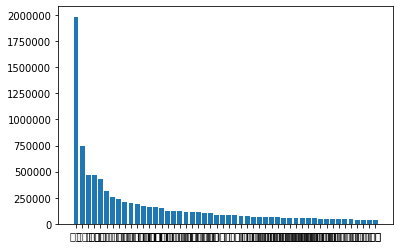

In [261]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

top1k = dict([(k, v) for k, v in p_counter.most_common(50) if v > 100])
plt.bar(top1k.keys(), top1k.values())

# 2. エンティティ・エンティティ型・プロパティ　間の関係データ

## (1) エンティティからプロパティを見る

- Key-Entity -> List[ (Property, Value-Entity) ]

In [262]:
ent2props = {triples_d['title_ja']: 
             [(pe['property_midasi']['ja'], e['entity_midasi']) 
              for pe in triples_d['properties']
              for e in pe['entities']] 
             for triples_d in kb}
len(ent2props)

2091469

In [77]:
ent2props['米']

[('記事の中心カテゴリ', 'Category:米'),
 ('この天然物の元になる分類群', 'イネ属'),
 ('この天然物の元になる分類群', 'マコモ'),
 ('上位クラス', '穀物'),
 ('上位クラス', '主食'),
 ('上位クラス', '穎果'),
 ('上位クラス', '食材'),
 ('ウィキメディアプロジェクトの作業リスト', 'Wikipedia:すべての言語版にあるべき項目の一覧'),
 ('以下を含む', 'デンプン'),
 ('用途', 'オートミール'),
 ('用途', 'ミートボール#各国のミートボール'),
 ('用途', 'リゾット'),
 ('用途', 'ナシゴレン'),
 ('以下と異なる', 'イネ')]

## (2) エンティティ型からエンティティを見る
外部新聞データに対するNER・統計量に基づいた分析
- Entity-Type -> Entities

In [263]:
with open(workdir / 'most_common_entities_per_enttype.tsv') as fp:
    type_ene_count_list = [l.split('\t') for l in fp.read().split('\n') if len(l.split('\t')) == 3]
    
print('total number of types of entity-type-pairs')
print(len(type_ene_count_list))

total number of types of entity-type-pairs
201840


In [266]:
enetype2ene = defaultdict(list)
for enetype, ene, count in type_ene_count_list:
    enetype2ene[enetype].append((ene, count))

print('numbers of types of per entity-types')
for enetype, v in sorted(enetype2ene.items(), key=lambda x: -len(x[1])):
    print(f'entity_type: {enetype}')
    print(f'#of_entities: {len(v)}')

numbers of types of per entity-types
entity_type: NAME/PERSON
#of_entities: 46401
entity_type: NAME/ORGANIZATION/CORPORATION/COMPANY
#of_entities: 28198
entity_type: NAME/FACILITY/GOE/GOE_OTHER
#of_entities: 12029
entity_type: NAME/PRODUCT/TITLE/POSITION_VOCATION
#of_entities: 11574
entity_type: NAME/PRODUCT/PRODUCT_OTHER
#of_entities: 10627
entity_type: NAME/PRODUCT/DOCTRINE_METHOD/DOCTRINE_METHOD_OTHER
#of_entities: 7982
entity_type: NAME/PRODUCT/FOOD/FOOD_OTHER
#of_entities: 7082
entity_type: NAME/LOCATION/GPE/CITY
#of_entities: 6320
entity_type: NAME/ORGANIZATION/CORPORATION/CORPORATION_OTHER
#of_entities: 5738
entity_type: NAME/PRODUCT/FOOD/DISH
#of_entities: 5698
entity_type: NAME/ORGANIZATION/POLITICAL_ORGANIZATION/GOVERNMENT
#of_entities: 4028
entity_type: NAME/FACILITY/GOE/SCHOOL
#of_entities: 2628
entity_type: NAME/EVENT/OCCASION/OCCASION_OTHER
#of_entities: 2540
entity_type: NAME/EVENT/OCCASION/GAME
#of_entities: 2336
entity_type: NAME/FACILITY/GOE/STATION
#of_entities: 1661

In [133]:
enetype2ene['NAME/PRODUCT/PRODUCT_OTHER']

[('GDP', '525'),
 ('日 経 平均 株価', '483'),
 ('ス マ ホ', '325'),
 ('iPhone', '300'),
 ('AI', '194'),
 ('イン スタ グラム', '153'),
 ('LINE', '146'),
 ('ビット コイン', '143'),
 ('I o T', '143'),
 ('ユー チューブ', '141'),
 ('日 経 平均', '126'),
 ('リチウム イオン 電池', '119'),
 ('au', '105'),
 ('知的 財産 権', '101'),
 ('著作権', '92'),
 ('LINE ペイ', '92'),
 ('アンド ロイド', '89'),
 ('Wi ― Fi', '87'),
 ('メル カリ', '84'),
 ('慰 謝 料', '84'),
 ('国内 総 生産', '83'),
 ('金メダル', '78'),
 ('NE M', '78'),
 ('ブルー トゥー ス', '76'),
 ('パスポート', '74'),
 ('ゾ ゾ タウン', '73'),
 ('iPhone X', '72'),
 ('消費税 率', '72'),
 ('L ME', '71'),
 ('ET F', '68'),
 ('ウィー チャ ット ペイ', '67'),
 ('ニンテンドー スイッチ', '65'),
 ('Suica', '59'),
 ('i PS 細胞', '58'),
 ('関税', '58'),
 ('ドル', '54'),
 ('OD A', '53'),
 ('ネ ム', '53'),
 ('法定 雇用 率', '53'),
 ('発光 ダイ オー ド', '52'),
 ('R PA', '51'),
 ('アリ ペイ', '50'),
 ('iOS', '48'),
 ('d ポイント', '47'),
 ('障害者 手帳', '47'),
 ('ギ ガ', '46'),
 ('F DA', '42'),
 ('ポケモン GO', '42'),
 ('アマゾン', '41'),
 ('TOP IX', '41'),
 ('転換 社 債', '40'),
 ('支 付 宝 ( アリ ペイ )', '39'),
 ('e

## (3) プロパティからエンティティペアを見たい
- Property -> (Key-Entity, Value-Entity)

In [80]:
prop2entpairs = defaultdict(list) 
for ent1, props in ent2props.items():
    for prop, ent2 in props:
        prop2entpairs[prop].append( (ent1, ent2) )
print(len(prop2entpairs))

1044

# 3. 関係語彙（プロパティ集合）の絞り込み作業

## (作業1) 無視するプロパティを目視で絞り込み（しんどい）

### エンティティ型を特定する力が弱い順にソート
- エンティティ型を文書とみなした上で document frequency を計算、降順

In [74]:
# Specificity of properties (idf with entity_types as documents)

# get counts of properties for each ene-types
# given ent2props: Dict[entity, Tuple[property, entity]]

enetype2propcounters = {
    enetype: Counter([
        p
        for ent in [ent for ent, _ in ent_counts if ''.join(ent.split(' ')) in ent2props]
        for p, _ in ent2props[''.join(ent.split(' '))]
    ])
    for enetype, ent_counts in enetype2ene.items()
}


d = {
    enetype: [x for x, _ in enetype2propcounters[enetype].most_common(10)]
    for enetype, _ in sorted(enetype2ene.items(), key=lambda x: -len(x[1]))
}

df = Counter([v for vs in d.values() for v in vs])
len(d), df.most_common()  #  / 149

[('分類', 146),
 ('国', 111),
 ('記事の中心カテゴリ', 100),
 ('以下を含む', 66),
 ('上位クラス', 63),
 ('位置する行政区画', 50),
 ('掲載している事典', 47),
 ('以下の一部分', 41),
 ('出演者', 30),
 ('以下と異なる', 28),
 ('本部所在地', 27),
 ('所属グループ', 24),
 ('ジャンル', 21),
 ('本国', 20),
 ('姉妹都市', 18),
 ('直下の行政区画', 18),
 ('運営者', 16),
 ('国交のある国', 16),
 ('名前の由来', 14),
 ('言語', 13),
 ('隣の国または行政区画', 13),
 ('下部組織', 11),
 ('分類階級', 11),
 ('同一とされる事物', 10),
 ('所有物', 10),
 ('使用言語', 10),
 ('場所', 10),
 ('上位タクソン', 10),
 ('受賞', 9),
 ('ウィキメディアプロジェクトの作業リスト', 9),
 ('材料', 8),
 ('スポーツ', 8),
 ('支流', 8),
 ('創設者', 8),
 ('職業', 7),
 ('性別', 7),
 ('所有者', 7),
 ('以下と接続', 7),
 ('次', 7),
 ('発見者または発明者', 7),
 ('レコード・レーベル', 7),
 ('組織形態', 6),
 ('標準時間帯', 6),
 ('指導者', 6),
 ('IUCN保全状況', 6),
 ('終端', 6),
 ('重要な出来事', 6),
 ('管轄・適用区域', 5),
 ('登場人物', 5),
 ('原因', 5),
 ('声優', 5),
 ('ノミネート', 5),
 ('遺産保護指定', 5),
 ('位置する保護区', 5),
 ('部首', 5),
 ('記事の中心テンプレート', 5),
 ('業種', 4),
 ('以下を運用する', 4),
 ('管理者', 4),
 ('親項目', 4),
 ('先行', 4),
 ('参加者', 4),
 ('発行者', 4),
 ('演奏者・歌手', 4),
 ('建築様式', 4),
 ('製造元', 4)

In [92]:
# propertyごとにどういったentityペアが結ばれるか
for p, v in df.most_common(100):  # df高い順(i.e. エンティティ型特定力弱い順)に
    print(p)
    pairs = prop2entpairs[p]
    print(len(pairs))
    pp.pprint(random.sample(pairs, 10))
    print()

分類
0.29541520571656826
1883535
[('アレックス・クラマー', 'ヒト'),
 ('NAP', 'ウィキメディアの曖昧さ回避ページ'),
 ('ミュッケンドルフ', 'オルツタイル'),
 ('堀井聡', 'ヒト'),
 ('鬼頭里枝', 'ヒト'),
 ('2013年9月25日', '9月25日'),
 ('熱帯低気圧ベビンカ', 'ウィキメディアの曖昧さ回避ページ'),
 ('東城鮮友会 非常時を自覚（会員２０名）', 'ニュース記事'),
 ('レオン・サンロフ', 'ヒト'),
 ('Template:Unicode chart Dingbats', 'ウィキメディアのテンプレート')]

国
0.29541520571656826
439990
[('ベルリン市議会', 'ドイツ'),
 ('岡崎インターチェンジ', '日本'),
 ('初谷温泉', '日本'),
 ('ホモンナイ', 'スロバキア'),
 ('広島県道333号', '日本'),
 ('クーアフュルステンダム', 'ドイツ'),
 ('マトゥリン', 'ベネズエラ'),
 ('ジンバブエサッカー協会', 'ジンバブエ'),
 ('ジョッキ・クルベ・ブラジレイロ', 'ブラジル'),
 ('プリーサル', 'イギリス')]

記事の中心カテゴリ
0.29541520571656826
54524
[('ノッティンガム伯爵', 'Category:ノッティンガム伯'),
 ('トルイ家', 'Category:トルイ家'),
 ('1991年東南アジア競技大会', 'Category:1991年東南アジア競技大会'),
 ('楠桂', 'Category:楠桂'),
 ('さくら市', 'Category:さくら市'),
 ('ラオスの国際関係', 'Category:ラオスの国際関係'),
 ('宝塚歌劇団46期生', 'Category:宝塚歌劇団46期生'),
 ('マーチャーシュ1世', 'Category:マーチャーシュ1世'),
 ('1998 FIFAワールドカップ', 'Category:1998 FIFAワールドカップ'),
 ('1104年', 'Category:1104年')]

以下を含む
0.29541520571656826
5685

0.29541520571656826
106957
[('アリシア・デ・ラローチャ', 'カタルーニャ州政府ゴールドメダル'),
 ('ジャン＝マリ・ギュスターヴ・ル・クレジオ', 'レジオンドヌール勲章オフィシエ'),
 ('オーギュスト・デュバイユ', 'レジオンドヌール勲章グランクロワ'),
 ('オレグ・ケレンスキー', '大英帝国勲章 (コマンダー)'),
 ('ヴィルヘルム・ゲナツィーノ', '自由ハンザ都市ブレーメン文学賞'),
 ('奈良原一高', '紫綬褒章'),
 ('ジャック・ピアース (野球)', 'メキシコ野球殿堂'),
 ('ナポレオン＝シャルル・ボナパルト', 'レジオンドヌール勲章オフィシエ'),
 ('ルドルフ', '聖アヌンツィアータ騎士団'),
 ('シャルル・シェーヌ', '芸術文化勲章コマンドゥール')]

ウィキメディアプロジェクトの作業リスト
0.29541520571656826
1652
[('イベイー', 'アート+フェミニズム'),
 ('李白', 'Wikipedia:すべての言語版にあるべき項目の一覧'),
 ('ヘレン・チャドウィック', 'アート+フェミニズム'),
 ('体', 'Wikipedia:すべての言語版にあるべき項目の一覧'),
 ('儒教', 'Wikipedia:すべての言語版にあるべき項目の一覧'),
 ('バーバラ・ヘップワース', 'アート+フェミニズム'),
 ('酵素', 'Wikipedia:すべての言語版にあるべき項目の一覧'),
 ('オディール・デック', 'アート+フェミニズム'),
 ('音節', 'Wikipedia:すべての言語版にあるべき項目の一覧'),
 ('ねじ', 'Wikipedia:すべての言語版にあるべき項目の一覧')]

材料
0.29541520571656826
6999
[('サンタ・マリーア・デル・ナランコ教会', '石'),
 ('上田城', '石'),
 ('ワシントン記念塔', 'カトリナイト'),
 ('ヴィルンガ山地', '火山岩'),
 ('セット港の眺め', 'キャンバス'),
 ('すみれの花束をつけたベルト・モリゾ', 'キャンバス'),
 ('カニカマ', '魚肉練り製品'),
 ('世界の舞台', '紙'),
 (

0.29541520571656826
8401
[('カミング', 'フォーサイス郡'),
 ('グルジャ市', 'ジュンガル'),
 ('ダカール', 'フランス領西アフリカ'),
 ('フェリザイ', 'フェリザイ郡'),
 ('メドニン', 'メドニン県'),
 ('トンサ', 'トンサ県'),
 ('トリンコマリー', '東部州'),
 ('ブローニュ＝ビヤンクール', 'ブローニュ＝ビヤンクール郡'),
 ('フローニンゲン (スリナム)', 'サラマッカ'),
 ('マーチ (ケンブリッジシャー)', 'フェンランド')]

行政府の長
0.29541520571656826
1822
[('ペルミ州', 'ゲンナジー・ヴャチェスラヴォヴィッチ・イグムノフ'),
 ('バイエルン自由州', 'ホルスト・ゼーホーファー'),
 ('第一次ヤツェニュク暫定政権', 'アルセニー・ヤツェニュク'),
 ('ルガンスク人民共和国', 'セルゲイ・コズロフ'),
 ('ウクライナ・ソビエト社会主義共和国', 'デミヤン・コロトチェンコ'),
 ('チェコスロバキア', 'ラディスラフ・アダメッツ'),
 ('アメリカ合衆国', 'ウィリアム・ハリソン'),
 ('クック諸島', 'ヘンリー・プナ'),
 ('新北市', '侯友宜'),
 ('カンタブリア州', 'ミゲル・アンヘル・レビージャ')]

生産品目
0.29541520571656826
3318
[('日産自動車', '貨物自動車'),
 ('ジョン・ロブ', '靴'),
 ('ラングラー', '作業服'),
 ('クローネンブルグ', 'ビール'),
 ('蝸牛数字', 'ソフトウェア'),
 ('サンライフ・フィナンシャル', '医療保険'),
 ('ヴォロシロフグラード機関車工場', '電車'),
 ('エレクトロニック・アーツ', 'メダル・オブ・オナー'),
 ('DVS', '履物'),
 ('アエロ', 'L-39NG')]

前
0.29541520571656826
79620
[('ルパン三世 カリオストロの城', 'ルパン三世 パンドラの遺産'),
 ('カテゴリ:2013年9月16日', 'カテゴリ:2013年9月15日'),
 ('時計と魔法のビスケット', 'Chimer

In [ ]:
# 無視するプロパティの絞り込み（目見だとしんどい）
ignore_props = {
    '記事の中心カテゴリ', '次', '前', '記事の中心テンプレート', '親項目', 'ウィキメディアプロジェクトの作業リスト',  # wikipedia特有
    '掲載している事典', '名前の由来', '言語', '使用言語', '部首', '分類階級', '上位タクソン',  # 辞書・語彙・分類学的な知識は不要そう
    '隣の国または行政区画', '支流', '以下と接続',  # 地理的関係・位置関係
    '同一とされる事物',  # ?
    '以下と異なる',  # 類似するが区別される語；もしかして〜に使えそう
}

## (作業2) 無視するプロパティを統計量で絞り込み（100件程度は減らせる）

In [111]:
# propertyごとにどういったentityペアが結ばれるか
prop2stats = {}
for p, v in df.items():  # df高い順(i.e. エンティティ型特定力弱い順)に
    pairs = prop2entpairs[p]
    lhs_entities = {lhs for lhs, _ in pairs}
    rhs_entities = {rhs for _, rhs in pairs}
    r2l_ratio = len(rhs_entities) / len(lhs_entities) if len(lhs_entities) > 0 else 0.
    prop2stats[p] = {'ntypes_left': len(lhs_entities), 'ntypes_right': len(rhs_entities), 'r2l_ratio': r2l_ratio, 'len_pairs': len(pairs), 'entitytype_df': v}


### (2.a) 値エンティティのバリエーションが絶対値で少ないものの順に並ぶ (値エンティティのタイプ数降順)
- 値エンティティの種類が少ないものは、辞典的で 話題性の薄い エンティティが多いことが観察される
   - 例. プロパティ'性別'　に関して
   - 値エンティティが数種類:　男性・女性・オス・メス・中世・トランスジェンダーの女性・トランスジェンダーの男性・ノンバイナリ etc.
- 観察の結果、値エンティティのタイプ数が 200 以下のものは無視することにした

In [119]:
# 無視したエンティティ
# 属性値のバリエーションが絶対値で少ないものの順に並ぶ
# 例外. '役割', '政治的立場', 'ブランド'
nrhs_thre = 200
sorted(filter(lambda x: x[1]['ntypes_right'] < nrhs_thre , prop2stats.items()), key=lambda x: x[1]['ntypes_right'])
# sorted(prop2stats.items(), key=lambda x: x[1]['ntypes_right'])

[('元期',
  {'ntypes_left': 4535,
   'ntypes_right': 1,
   'r2l_ratio': 0.0002205071664829107,
   'len_pairs': 4535,
   'entitytype_df': 1}),
 ('危険性表示規格・分類',
  {'ntypes_left': 1063,
   'ntypes_right': 2,
   'r2l_ratio': 0.0018814675446848542,
   'len_pairs': 1088,
   'entitytype_df': 1}),
 ('著作権の状況',
  {'ntypes_left': 4835,
   'ntypes_right': 2,
   'r2l_ratio': 0.0004136504653567735,
   'len_pairs': 6762,
   'entitytype_df': 2}),
 ('Gram staining',
  {'ntypes_left': 522,
   'ntypes_right': 2,
   'r2l_ratio': 0.0038314176245210726,
   'len_pairs': 522,
   'entitytype_df': 2}),
 ('political coalition',
  {'ntypes_left': 2,
   'ntypes_right': 3,
   'r2l_ratio': 1.5,
   'len_pairs': 3,
   'entitytype_df': 1}),
 ('相互作用',
  {'ntypes_left': 68,
   'ntypes_right': 4,
   'r2l_ratio': 0.058823529411764705,
   'len_pairs': 143,
   'entitytype_df': 1}),
 ('気象庁震度階級',
  {'ntypes_left': 13,
   'ntypes_right': 7,
   'r2l_ratio': 0.5384615384615384,
   'len_pairs': 13,
   'entitytype_df': 1}),
 ('has bou

### (2.b) キーエンティティと値エンティティのバリエーションがほぼ等しい関係
- エンティティ間で対称な関係を想定
- カテゴリやwikipediaページ間関係など、メタデータ的な関係が多い

In [130]:
# 比率 ~= 1.0
# 例外. '反対の概念', '以下と異なる', '配偶者'

import numpy as np
# [(p, prop2stats[p]) for p in prop2stats if 'カテゴリ' in p]
[p for p, v in prop2stats.items() if np.abs(1 - v['r2l_ratio']) < 0.1]

['同一とされる事物',
 '記事の中心カテゴリ',
 '専門的職業の分野',
 '以下と異なる',
 '姉妹都市',
 '隣の国または行政区画',
 '教育機関の卒業者のカテゴリ',
 '組織の被雇用者用カテゴリ',
 '隣の駅',
 '原因',
 '遺伝的関連',
 '次',
 '前',
 '創設者',
 '入居者',
 '反対の概念',
 '以下の直接の原因',
 '受賞者のカテゴリ',
 '空港周辺の場所',
 '流入源',
 'この分類群を元にしてできる物',
 '水系のカテゴリ',
 '以下の原因',
 '記事の中心テンプレート',
 'indigenous to',
 '株価指数',
 '当地の人々のカテゴリ',
 '命名者',
 '組織長の地位',
 '一つ下位のランク',
 '一つ上位のランク',
 '兄弟姉妹',
 '配偶者']

### (2.c) 値エンティティのバリエーションが相対的に少ないものの順に並ぶ ( 値 / キーエンティティのタイプ数比の降順)
- 上記(2.a) (2.b) の前処理結果を受けて処理
- キーエンティティと値エンティティのバリエーション差を観察する

In [131]:
# 属性値のバリエーションが相対的に少ないものの順に並ぶ
# '国' は除去してよいかも (雑な国の関係性)
# (2.a)の漏れ: '役割', '政治的立場', 'ブランド'
# (2.b)の漏れ: '反対の概念'

nrhs_thre = 200
even_thre = 0.1
print(len(prop2stats))
items = prop2stats.items()
items = filter(lambda x: x[1]['ntypes_right'] > nrhs_thre , items)
prop2stats_filtered = filter(lambda x: np.abs(1 - x[1]['r2l_ratio']) > even_thre, items)
prop2stats_sorted = sorted(prop2stats_filtered, key=lambda x: x[1]['r2l_ratio'])
print(len(prop2stats_sorted))
prop2stats_sorted


214
129


[('国',
  {'ntypes_left': 427039,
   'ntypes_right': 1202,
   'r2l_ratio': 0.0028147312072199495,
   'len_pairs': 439990,
   'entitytype_df': 111}),
 ('スポーツ',
  {'ntypes_left': 144973,
   'ntypes_right': 450,
   'r2l_ratio': 0.0031040262669600545,
   'len_pairs': 149885,
   'entitytype_df': 8}),
 ('国籍',
  {'ntypes_left': 387497,
   'ntypes_right': 1222,
   'r2l_ratio': 0.00315357280185395,
   'len_pairs': 417195,
   'entitytype_df': 1}),
 ('職業',
  {'ntypes_left': 417062,
   'ntypes_right': 2161,
   'r2l_ratio': 0.005181483808162815,
   'len_pairs': 718135,
   'entitytype_df': 7}),
 ('本国',
  {'ntypes_left': 68381,
   'ntypes_right': 458,
   'r2l_ratio': 0.0066977669235606385,
   'len_pairs': 73974,
   'entitytype_df': 20}),
 ('掲載している事典',
  {'ntypes_left': 38331,
   'ntypes_right': 291,
   'r2l_ratio': 0.007591766455349456,
   'len_pairs': 53814,
   'entitytype_df': 47}),
 ('言語',
  {'ntypes_left': 53823,
   'ntypes_right': 418,
   'r2l_ratio': 0.007766196607398324,
   'len_pairs': 57916,


In [271]:
# < 1.0
prop2entpairs['ブランド'] #['以下の原因']  #['反対の概念']  # ['原因']  #['専門的職業の分野']  #['ブランド']  # ['法的根拠']  #['国']  #['役割']


[('ジャッファ・ケーキ', 'モンデリーズ・インターナショナル'),
 ('シボレー・スピン', 'シボレー'),
 ('三菱・パジェロイオ', '三菱自動車工業'),
 ('シボレー・HHR', 'シボレー'),
 ('ポンティアック・ボンネヴィル', 'ポンティアック'),
 ('タタ・ナノ', 'タタ・モーターズ'),
 ('モンタナ', 'ポンティアック'),
 ('アルファロメオ・147', 'アルファ・ロメオ'),
 ('フォルクスワーゲン・EA489', 'フォルクスワーゲン'),
 ('リオ', 'パンサー・ウェストウインズ'),
 ('アルファロメオ・GTV', 'アルファ・ロメオ'),
 ('トヨタ・カローラ', 'トヨタ自動車'),
 ('オペル・ベクトラ', 'オペル'),
 ('アルファロメオ・スプリント', 'アルファ・ロメオ'),
 ('ホンダ・CR-V', '本田技研工業'),
 ('アウディ・V8', 'アウディ'),
 ('アウディ・R15 TDI', 'アウディ'),
 ('ベンツ・パテント・モトールヴァーゲン', 'ベンツ&シー・ライニッシェ・ガスモトーレン・ファブリーク'),
 ('ベンツ・パテント・モトールヴァーゲン', 'メルセデス・ベンツ'),
 ('レッツォ/タクマ', 'シボレー'),
 ('日産・マキシマ', '日産自動車'),
 ('フォルクスワーゲン・イルティス', 'フォルクスワーゲン'),
 ('シュコダ・100', 'シュコダ'),
 ('日産・シルフィ', '日産自動車'),
 ('セアト・イビサ', 'セアト'),
 ('ヒュンダイ・アクセント', '現代自動車'),
 ('ヒュンダイ・ベラクルーズ', '現代自動車'),
 ('ヒュンダイ・エクウス', '現代自動車'),
 ('キア・セフィア', '起亜自動車'),
 ('ルノーサムスン・SM7', 'ルノーサムスン自動車'),
 ('ヒュンダイ・ポニー', '現代自動車'),
 ('マツダ・デミオ', 'マツダ'),
 ('ポルシェ・パナメーラ', 'ポルシェ'),
 ('シトロエン・クサラ', 'シトロエン'),
 ('アストンマーチン・DB7', 'アストンマーチン'),
 ('プジョー・202', 'プジョー'),
 ('フェラーリ・F

In [269]:
# > 1.0
prop2entpairs['所有物']


[('ジョージ・W・ブッシュ', 'インディア'),
 ('ジョージ・W・ブッシュ', 'ミス・ビーズリー (犬)'),
 ('ジョージ・W・ブッシュ', 'バーニー'),
 ('デュッセルドルフ', 'デュッセルドルフ国際空港'),
 ('ACFフィオレンティーナ', 'FCプネー・シティ'),
 ('孫悟空', '如意金箍棒'),
 ('シエーナ', 'スタディオ・アルテミオ・フランキ＝モンテパスキ・アレーナ'),
 ('パラマリボ', 'アンドレ・カンペルフェーン・スタディオン'),
 ('ポテンツァ', 'スタディオ・アルフレド・ヴィヴィアーニ'),
 ('クラスノダール地方', 'クバン・スタジアム'),
 ('クラスノダール地方', 'FCクバン・クラスノダール'),
 ('バンベルク', 'ブローゼ・アレーナ'),
 ('アストラハン州', 'FCヴォルガル・アストラハン'),
 ('アシャッフェンブルク', 'スタディオン・アム・シェーンブッシュ'),
 ('南カリフォルニア大学', 'ガレン・センター'),
 ('南カリフォルニア大学', 'デドゥー・フィールド'),
 ('ジョージア', 'ギヴィ・キラゼ・スタディオニ'),
 ('ジョージア', 'ミヘイル・メスヒ・スタジアム'),
 ('SABミラー', '南アフリカ醸造社'),
 ('SABミラー', 'ティミショアレアナ'),
 ('SABミラー', 'ウルスス'),
 ('SABミラー', 'ビューラー'),
 ('SABミラー', 'ザンビアン・ビール'),
 ('バシコルトスタン共和国', 'FCウファ'),
 ('バシコルトスタン共和国', 'ウファ国際空港'),
 ('西安市', '西安地下鉄2号線'),
 ('西安市', '西安地下鉄1号線'),
 ('西安市', '西安地下鉄3号線'),
 ('西安市', '西安地下鉄4号線'),
 ('パヴィーア', 'スタディオ・ピエトロ・フォーチュナティ'),
 ('グロッセート', 'スタディオ・オリンピコ・カルロ・ゼッキーニ'),
 ('国家社会主義ドイツ労働者党', '褐色館'),
 ('国家社会主義ドイツ労働者党', 'ヨナス百貨店'),
 ('国家社会主義ドイツ労働者党', 'フェルキッシャー・ベオバハター'),
 ('国家社

In [134]:
entpair2prop = {ep: p for p, eps in prop2entpairs.items() for ep in eps}

## (作業3) エンティティ型によるプロパティの整理
- 関係の方向性
   - 'スポーツ' (PERSON -> SPORTS)
   - '所有物' (AGENT -> THING) <-> '所有者' (THING -> AGENT), '開発元または開発者', '製造元', etc.

- 関係の類似性(グルーピング)
   - (COUNTRY, COUNTRY) を結ぶ関係性はまとめる、等

In [148]:
ent2props['Pixel 3']

[('開発元または開発者', 'Google'),
 ('上位クラス', 'スマートフォン'),
 ('前', 'Pixel 2'),
 ('シリーズ', 'Google Pixel'),
 ('分類', 'スマートフォンの機種'),
 ('製造元', 'フォックスコン')]

In [149]:
ent2props['Google']

[('所有物', 'Google Keep'),
 ('所有物', 'Google Fonts'),
 ('所有物', 'DeepMind'),
 ('所有物', 'スカイボックス・イメージング'),
 ('所有物', 'ナレッジグラフ'),
 ('所有物', 'Google フォト'),
 ('所有物', 'Google Dataset Search'),
 ('所有物', 'Google Now'),
 ('所有物', 'Google翻訳'),
 ('所有物', 'VirusTotal'),
 ('所有物', 'Google Fiber'),
 ('所有物', '8番街 111番'),
 ('所有物', 'Blogger'),
 ('所有物', 'Google AdSense'),
 ('所有物', 'Knol'),
 ('所有物', 'Google ブックス'),
 ('所有物', 'Google Wave'),
 ('所有物', 'Google ストリートビュー'),
 ('所有物', 'Google ビデオ'),
 ('所有物', 'Google Analytics'),
 ('所有物', 'orkut'),
 ('所有物', 'Panoramio'),
 ('所有物', 'アドワーズ'),
 ('所有物', 'iGoogle'),
 ('所有物', 'elgooG'),
 ('所有物', 'Google アートプロジェクト'),
 ('所有物', 'Googleリーダー'),
 ('所有物', 'Google Labs'),
 ('所有物', 'VEVO'),
 ('所有物', 'Google Buzz'),
 ('所有物', 'Google Scholar'),
 ('所有物', 'G Suite'),
 ('所有物', 'Google 画像検索'),
 ('所有物', 'Google Cloud Print'),
 ('所有物', 'Google Sites'),
 ('所有物', 'Google ソースコード検索'),
 ('所有物', 'Googleplex'),
 ('所有物', 'FeedBurner'),
 ('所有物', 'Googleグループ'),
 ('所有物', 'Google Trends'),
 ('所有物', 'Google 

### エンティティに関する語彙制限（日経新聞1年分に頻度１０以上で出現するエンティティのみ考慮）

In [165]:
# vocabulary restriction ()
import pickle

# another_threshold = 10
with open(workdir / "occ_counts_map.pkl", "rb") as fp:
    occ_counts_map = pickle.load(fp)
ent_counter = Counter()
for k, counter in occ_counts_map.items():
    ent_counter += counter

# キーエンティティタイプ数: 2091469 -> 50567
ent_counter_raw = {''.join(k.split(' ')): v for k, v in ent_counter.items()}
ent2props_nikkei = {e: ent2props[e] for e in ent2props if e in ent_counter_raw}
len(ent_counter_raw), len(ent2props), len(ent2props_nikkei)

(183360, 2091469, 50567)

In [167]:
ent2enttype_nikkei = defaultdict(list)   # Entity -> Entity-Type
ent_type2counter_nikkei = defaultdict(int)  # (Entity, Entity-Type) -> count(新聞データ内の出現)
for enttype, counter in occ_counts_map.items():
    for k, c in counter.items():
        k = ''.join(k.split(' '))
        ent2enttype_nikkei[k].append(enttype)
        ent_type2counter_nikkei[(k, enttype)] += c
len(ent2enttype_nikkei), len(ent_type2counter_nikkei)
# ent_counter_raw = {''.join(k.split(' ')): v for k, v in ent_counter.items()}

(183360, 201606)

In [207]:
# エンティティ型を頻度順にソートし、1つに絞る（曖昧性を無視）
ent2enttype_nikkei_sorted = {k: sorted(vs, key=lambda v: -ent_type2counter_nikkei[(k, v)])[0]
                             for k, vs in ent2enttype_nikkei.items()}


In [259]:
ent2enttype_nikkei_sorted['フォックスコン']

'NAME/ORGANIZATION/CORPORATION/COMPANY'

### Property -> List[ (キーエンティティ, 値エンティティ) ]
- プロパティに対して、　エンティティのペア・エンティティ型のペア　のバリエーションがどうなっているかの観察

In [217]:
# from itertools import product


prop2enttypepairs = defaultdict(list)
for p, eps in prop2entpairs.items():
    for el, er in eps:
        if el in ent2enttype_nikkei_sorted and er in ent2enttype_nikkei_sorted:
            prop2enttypepairs[p].append(  #list(product(
                (ent2enttype_nikkei_sorted[el], ent2enttype_nikkei_sorted[er])
            #))
                                       )

In [221]:
# 上位3件程度の型ペアで90%程度説明できるか

prop2enttypepairs_counter = {p: Counter({k: v for k, v in Counter(eps).items() if v > 1}).most_common()
                             for p, eps in prop2enttypepairs.items()}
prop2enttypepairs_counter

{'国': [(('NAME/LOCATION/GPE/CITY', 'NAME/LOCATION/GPE/COUNTRY'), 2509),
  (('NAME/ORGANIZATION/CORPORATION/COMPANY', 'NAME/LOCATION/GPE/COUNTRY'),
   2463),
  (('NAME/FACILITY/GOE/GOE_OTHER', 'NAME/LOCATION/GPE/COUNTRY'), 925),
  (('NAME/FACILITY/GOE/STATION', 'NAME/LOCATION/GPE/COUNTRY'), 775),
  (('NAME/FACILITY/GOE/SCHOOL', 'NAME/LOCATION/GPE/COUNTRY'), 565),
  (('NAME/ORGANIZATION/CORPORATION/CORPORATION_OTHER',
    'NAME/LOCATION/GPE/COUNTRY'),
   503),
  (('NAME/PERSON', 'NAME/LOCATION/GPE/COUNTRY'), 501),
  (('NAME/ORGANIZATION/POLITICAL_ORGANIZATION/GOVERNMENT',
    'NAME/LOCATION/GPE/COUNTRY'),
   313),
  (('NAME/FACILITY/LINE/ROAD', 'NAME/LOCATION/GPE/COUNTRY'), 286),
  (('NAME/FACILITY/LINE/RAILROAD', 'NAME/LOCATION/GPE/COUNTRY'), 281),
  (('NAME/LOCATION/GEOLOGICAL_REGION/ISLAND', 'NAME/LOCATION/GPE/COUNTRY'),
   224),
  (('NAME/LOCATION/GPE/COUNTRY', 'NAME/LOCATION/GPE/COUNTRY'), 223),
  (('NAME/LOCATION/GPE/PROVINCE', 'NAME/LOCATION/GPE/COUNTRY'), 197),
  (('NAME/PRODUCT/

In [219]:
# プロパティごとの エンティティ型ペアのタイプ数
print(len(prop2entpairs))
print(len(prop2enttypepairs_counter))
p2cnt = Counter({p: len(counter) for p, counter in prop2enttypepairs_counter.items() if len(counter) > 0}).most_common()
print(len(p2cnt))
p2cnt
#    for (etl, etr), cnt in counter.items():

1047
491
357


[('分類', 285),
 ('以下を含む', 144),
 ('国', 139),
 ('位置する行政区画', 138),
 ('上位クラス', 126),
 ('本部所在地', 111),
 ('以下と異なる', 88),
 ('以下の一部分', 87),
 ('姉妹都市', 67),
 ('名前の由来', 63),
 ('同一とされる事物', 60),
 ('言語', 55),
 ('隣の国または行政区画', 53),
 ('所有者', 52),
 ('本国', 47),
 ('物語の舞台', 45),
 ('直下の行政区画', 41),
 ('原語', 40),
 ('色', 40),
 ('結成場所', 38),
 ('職業', 37),
 ('所属グループ', 36),
 ('ジャンル', 35),
 ('場所', 35),
 ('スポーツ', 34),
 ('以下の岸にある', 34),
 ('出生地', 33),
 ('運営者', 33),
 ('上部組織', 33),
 ('撮影地', 32),
 ('名', 31),
 ('材料', 30),
 ('国交のある国', 29),
 ('位置する地形', 28),
 ('国籍', 26),
 ('所有物', 25),
 ('下部組織', 25),
 ('姓', 24),
 ('生産品目', 24),
 ('公用語', 22),
 ('創設者', 22),
 ('次', 21),
 ('管轄・適用区域', 21),
 ('業種', 20),
 ('使用言語', 19),
 ('分類階級', 19),
 ('行政中心地', 18),
 ('前', 18),
 ('小惑星グループ', 18),
 ('以下の首都', 18),
 ('勤務先', 17),
 ('主要作品', 17),
 ('出演者', 17),
 ('使用可能言語', 16),
 ('大陸', 16),
 ('配給元', 16),
 ('宗教', 15),
 ('発行者', 15),
 ('反対の概念', 15),
 ('専門分野', 14),
 ('制作会社', 14),
 ('製造元', 14),
 ('死亡地', 13),
 ('放送当初のネットワーク', 13),
 ('以下と接続', 13),
 ('演奏者・歌手', 13),
 

### cumsum上位80%頻度カバー範囲のみをとることで entity typeのエラーを吸収

In [235]:

entpair2prop_count = []#{(e1, e2): (p, c)
entpair2prop_dominant = {}

for p, counter_tpl in prop2enttypepairs_counter.items():
    counts = np.array([c for _, c in counter_tpl])
    ratio = np.cumsum(counts) / counts.sum()
    dominant_index = ratio[ratio > 0.8].shape[0]

    if dominant_index > 5:
        dominant_index = counts.shape[0]
    val = counter_tpl[:dominant_index]
    if len(val) > 0:
        entpair2prop_dominant[p] = val
print(len(prop2enttypepairs_counter))
print(len(entpair2prop_dominant))
for k, v in entpair2prop_dominant.items():
    print(k)
    pp.pprint(v[:5])

491
357
国
[(('NAME/LOCATION/GPE/CITY', 'NAME/LOCATION/GPE/COUNTRY'), 2509),
 (('NAME/ORGANIZATION/CORPORATION/COMPANY', 'NAME/LOCATION/GPE/COUNTRY'), 2463),
 (('NAME/FACILITY/GOE/GOE_OTHER', 'NAME/LOCATION/GPE/COUNTRY'), 925),
 (('NAME/FACILITY/GOE/STATION', 'NAME/LOCATION/GPE/COUNTRY'), 775),
 (('NAME/FACILITY/GOE/SCHOOL', 'NAME/LOCATION/GPE/COUNTRY'), 565)]
上位クラス
[(('NAME/PRODUCT/TITLE/POSITION_VOCATION',
   'NAME/PRODUCT/TITLE/POSITION_VOCATION'),
  497),
 (('NAME/PRODUCT/FOOD/DISH', 'NAME/PRODUCT/FOOD/DISH'), 205),
 (('NAME/DISEASE/ANIMAL_DISEASE', 'NAME/DISEASE/ANIMAL_DISEASE'), 204),
 (('NAME/PRODUCT/DOCTRINE_METHOD/ACADEMIC',
   'NAME/PRODUCT/DOCTRINE_METHOD/ACADEMIC'),
  151),
 (('NAME/PRODUCT/FOOD/FOOD_OTHER', 'NAME/PRODUCT/FOOD/FOOD_OTHER'), 126)]
分類
[(('NAME/PERSON', 'NAME/NATURAL_OBJECT/LIVING_THING/MAMMAL'), 9543),
 (('NAME/PERSON', 'NAME/PRODUCT/TITLE/TITLE_OTHER'), 1570),
 (('NAME/LOCATION/GEOLOGICAL_REGION/ISLAND', 'NAME/LOCATION/GPE/PROVINCE'),
  161),
 (('NAME/PRODUCT

  48),
 (('NAME/PRODUCT/TITLE/POSITION_VOCATION',
   'NAME/PRODUCT/DOCTRINE_METHOD/SPORT'),
  33),
 (('NAME/PRODUCT/TITLE/POSITION_VOCATION',
   'NAME/PRODUCT/TITLE/POSITION_VOCATION'),
  5),
 (('NAME/PRODUCT/TITLE/POSITION_VOCATION',
   'NAME/PRODUCT/DOCTRINE_METHOD/DOCTRINE_METHOD_OTHER'),
  3),
 (('NAME/PRODUCT/TITLE/POSITION_VOCATION',
   'NAME/ORGANIZATION/CORPORATION/COMPANY'),
  3)]
使用するもの
[(('NAME/PRODUCT/DOCTRINE_METHOD/SPORT', 'NAME/PRODUCT/CLOTHING'), 7),
 (('NAME/PRODUCT/DOCTRINE_METHOD/SPORT', 'NAME/PRODUCT/DOCTRINE_METHOD/SPORT'),
  4),
 (('NAME/PRODUCT/DOCTRINE_METHOD/SPORT', 'NAME/FACILITY/FACILITY_PART'), 4)]
登場する作品
[(('NAME/PERSON', 'NAME/PRODUCT/ART/BOOK'), 8),
 (('NAME/PERSON', 'NAME/PRODUCT/ART/MOVIE'), 7),
 (('NAME/ORGANIZATION/CORPORATION/COMPANY', 'NAME/PRODUCT/PRODUCT_OTHER'), 4),
 (('NAME/PRODUCT/FOOD/FOOD_OTHER', 'NAME/PRODUCT/ART/MOVIE'), 3),
 (('NAME/PRODUCT/PRODUCT_OTHER', 'NAME/PRODUCT/PRODUCT_OTHER'), 3)]
所属機関
[(('NAME/PERSON', 'NAME/ORGANIZATION/CORPORA

## (作業4) エンティティ型ごとにプロパティを整理する（WIP）

In [247]:
# 関連property を多く持つエンティティ(関連性が提示しやすい)

ent2prop_lr = defaultdict(set)
for p, entpair_count in entpair2prop_dominant.items():
    for (el, er), _ in entpair_count:
        ent2prop_lr[el].add(p)
        ent2prop_lr[er].add(p)
for k, v in sorted(ent2prop_lr.items(), key=lambda x: -len(x[1])):
    if len(v) > 2:
        print(k)
        pp.pprint(len(v))

NAME/PERSON
193
NAME/ORGANIZATION/CORPORATION/COMPANY
126
NAME/LOCATION/GPE/COUNTRY
101
NAME/PRODUCT/PRODUCT_OTHER
85
NAME/PRODUCT/TITLE/POSITION_VOCATION
83
NAME/LOCATION/GPE/CITY
78
NAME/FACILITY/GOE/GOE_OTHER
75
NAME/PRODUCT/FOOD/FOOD_OTHER
66
NAME/PRODUCT/FOOD/DISH
63
NAME/LOCATION/GPE/PROVINCE
58
NAME/PRODUCT/DOCTRINE_METHOD/DOCTRINE_METHOD_OTHER
56
NAME/ORGANIZATION/SPORTS_ORGANIZATION/PRO_SPORTS_ORGANIZATION
54
NAME/PRODUCT/ART/MOVIE
47
NAME/ORGANIZATION/INTERNATIONAL_ORGANIZATION
39
NAME/LOCATION/GPE/GPE_OTHER
38
NAME/ORGANIZATION/POLITICAL_ORGANIZATION/GOVERNMENT
37
NAME/ORGANIZATION/CORPORATION/CORPORATION_OTHER
36
NAME/NATURAL_OBJECT/LIVING_THING_PART/ANIMAL_PART
36
NAME/PRODUCT/VEHICLE/CAR
35
NAME/PRODUCT/DOCTRINE_METHOD/SPORT
34
NAME/PRODUCT/ART/BOOK
34
NAME/PRODUCT/ART/BROADCAST_PROGRAM
33
NAME/LOCATION/GEOLOGICAL_REGION/ISLAND
31
NAME/NATURAL_OBJECT/LIVING_THING/FLORA
31
NAME/ORGANIZATION/POLITICAL_ORGANIZATION/POLITICAL_ORGANIZATION_OTHER
29
NAME/PRODUCT/MATERIAL
28
NAM

In [255]:
ent2prop_lr['NAME/FACILITY/GOE/GOE_OTHER']

{'ジャンル',
 'スポーツ',
 'プラットフォーム',
 'レコード・レーベル',
 '上位クラス',
 '上部組織',
 '下部組織',
 '主要作品',
 '事業部門',
 '以下と接続',
 '以下と異なる',
 '以下についての',
 '以下の一部分',
 '以下の首都',
 '以下を含む',
 '位置する地形',
 '位置する行政区画',
 '使用可能言語',
 '依頼者',
 '元請建設会社',
 '入居者',
 '公用語',
 '出演者',
 '出生地',
 '出発地',
 '分類',
 '分類階級',
 '列車車庫',
 '創設者',
 '勤務先',
 '原語',
 '収監場所',
 '同一とされる事物',
 '名',
 '名前の由来',
 '国',
 '国籍',
 '場所',
 '姉妹都市',
 '姓',
 '小惑星グループ',
 '居住地',
 '所在地（街路名）',
 '所属グループ',
 '所属チーム',
 '所属正式路線',
 '所有物',
 '所有者',
 '撮影地',
 '本国',
 '本部所在地',
 '材料',
 '構造設計',
 '死亡地',
 '演奏者・歌手',
 '物語の舞台',
 '生産品目',
 '発行者',
 '監督',
 '直下の行政区画',
 '空港周辺の場所',
 '管理者',
 '終端',
 '結成場所',
 '職業',
 '色',
 '著者',
 '行政中心地',
 '言語',
 '設計',
 '証券取引所',
 '運営者',
 '重要な出来事',
 '開発元または開発者',
 '飼育生物'}

In [254]:
dd = defaultdict(int)
for k, v in sorted(ent2prop_lr.items(), key=lambda x: -len(x[1]))[:30]:
    dd['/'.join(k.split('/')[:2])] += len(v)

for k, v in Counter(dd).most_common():
    print(k, v)

NAME/PRODUCT 564
NAME/ORGANIZATION 321
NAME/LOCATION 306
NAME/PERSON 193
NAME/FACILITY 153
NAME/NATURAL_OBJECT 67
NAME/DISEASE 27


In [220]:
entpair2prop_count = {(e1, e2): (p, c)
                 for p, counter in prop2enttypepairs_counter.items()
                for (e1, e2), c in counter if c > 3}
print(len(entpair2prop_count))
sorted(entpair2prop_count.items(), key=lambda x: -x[1][1])
# entpair2prop_count

887


[(('NAME/PERSON', 'NAME/FACILITY/GOE/SCHOOL'), ('勤務先', 1574)),
 (('NAME/PERSON', 'NAME/PRODUCT/TITLE/TITLE_OTHER'), ('分類', 1570)),
 (('NAME/FACILITY/GOE/STATION', 'NAME/LOCATION/GPE/COUNTRY'), ('国', 775)),
 (('NAME/FACILITY/GOE/STATION', 'NAME/LOCATION/GPE/CITY'), ('位置する行政区画', 723)),
 (('NAME/ORGANIZATION/CORPORATION/COMPANY', 'NAME/FACILITY/GOE/MARKET'),
  ('証券取引所', 665)),
 (('NAME/PERSON', 'NAME/LOCATION/GPE/COUNTRY'), ('代表国', 641)),
 (('NAME/PERSON',
   'NAME/NATURAL_OBJECT/LIVING_THING_PART/LIVING_THING_PART_OTHER'),
  ('血液型', 558)),
 (('NAME/FACILITY/LINE/RAILROAD', 'NAME/LOCATION/GPE/PROVINCE'),
  ('位置する行政区画', 345)),
 (('NAME/FACILITY/GOE/STATION', 'NAME/ORGANIZATION/CORPORATION/COMPANY'),
  ('運営者', 338)),
 (('NAME/FACILITY/LINE/ROAD', 'NAME/LOCATION/GPE/COUNTRY'), ('国', 286)),
 (('NAME/FACILITY/LINE/ROAD', 'NAME/LOCATION/GPE/CITY'), ('主な経由都市', 283)),
 (('NAME/FACILITY/LINE/RAILROAD', 'NAME/LOCATION/GPE/COUNTRY'), ('国', 281)),
 (('NAME/PRODUCT/FOOD/DISH', 'NAME/LOCATION/GPE/COUNT